# Statistics of KuaiRec

We provide some basic statistics of the KuaiRec dataset. The description of this dataset can be referred to https://chongminggao.github.io/KuaiRec/

## Load data

In [1]:
# If you are running locally, make sure you are in the directory of KuaiRec.
rootpath="./"

If you are using Google Colab, make sure you have added shortcut of this [shared link](https://drive.google.com/drive/folders/1bAm07YnKRKB6SVHB8Mqz6v6W8ppLaJwB) to your own Google Drive. Then, you should load it from your space by indicating the correct path as follows.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# rootpath="./drive/MyDrive/Datasets/KuaiRec/" # Make sure this path corresponds to KuaiRec in your Drive.

In [3]:
import pandas as pd

print("Loading big matrix...")
big_matrix = pd.read_csv(rootpath + "data/big_matrix.csv")
print("Loading small matrix...")
small_matrix = pd.read_csv(rootpath + "data/small_matrix.csv")

print("Loading social network...")
social_network = pd.read_csv(rootpath + "data/social_network.csv")
social_network["friend_list"] = social_network["friend_list"].map(eval)

print("Loading item features...")
item_feat = pd.read_csv(rootpath + "data/item_feat.csv")
item_feat["feat"] = item_feat["feat"].map(eval)

print("All data loaded.")

Loading big matrix...
Loading small matrix...
Loading social network...
Loading item features...
All data loaded.


## Visualization of the four tables

In [4]:
big_matrix

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3650,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9599,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5263,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1964,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8235,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000
...,...,...,...,...,...,...,...,...
12530801,7175,1282,34618,140017,2020-09-05 15:07:10.576,20200905,1.599290e+09,0.247241
12530802,7175,3408,12619,21888,2020-09-05 15:08:45.228,20200905,1.599290e+09,0.576526
12530803,7175,10361,2407,7067,2020-09-05 19:10:29.041,20200905,1.599304e+09,0.340597
12530804,7175,10361,6455,7067,2020-09-05 19:10:36.995,20200905,1.599304e+09,0.913400


In [5]:
small_matrix

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3650,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5263,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8235,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364
...,...,...,...,...,...,...,...,...
4676565,7162,2268,11908,5467,NaN,NaN,NaN,2.178160
4676566,7162,2066,11919,6067,NaN,NaN,NaN,1.964562
4676567,7162,1297,16690,19870,NaN,NaN,NaN,0.839960
4676568,7162,4823,11862,24400,NaN,NaN,NaN,0.486148


In [6]:
item_feat

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]
...,...,...
10724,10724,[11]
10725,10725,[2]
10726,10726,[15]
10727,10727,[19]


In [7]:
social_network

,user_id,friend_list
0,3371,[2975]
1,24,[2665]
2,4402,[38]
3,4295,[4694]
4,7087,[7117]
...,...,...
467,2331,[4345]
468,6163,[1332]
469,3732,[670]
470,3335,[202]


## Codes for visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname="./SimHei.ttf")

def visual_continue(df, func=None):
    ax = sns.distplot(df)
    if func:
        func(ax)
    
    gca = plt.gca()
    fig_title = "Statistics of {}".format(df.name)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Density", fontsize=14)
    gca.set_xlabel(df.name, fontsize=14)
    
    plt.show()

def visual_statistics_discrete(df, var="my_variable", display_ratio=True, func=None, order=None, size=(6, 4.5)):
    ncount = len(df)

    fig = plt.figure(figsize=size)
    ax1 = fig.add_axes([0.14, 0.15, 0.74, 0.75])
    sns.countplot(x=df, color="#9fc5e8", linewidth=.6, edgecolor='k', ax=ax1, order=order)


    plt.grid(axis='y', linestyle='-.')

    gca = plt.gca()
    fig_title = "Statistics of {}".format(var)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Count", fontsize=14)
    gca.set_xlabel(var, fontsize=14)
    
    if func:
        func(ax1)

    if display_ratio:
        # Make twin axis
        ax2 = ax1.twinx()
        ax2.set_ylabel("ratio (%)", fontsize=14)


        for p in ax1.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax1.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                         ha='center', va='bottom', fontsize=10, rotation=30)  # set the alignment of the text

        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)

    plt.show()

In [9]:
import warnings; warnings.simplefilter('ignore')

## Statistics of social network

count    472.000000
mean       1.419492
std        0.853295
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: friend_list, dtype: float64


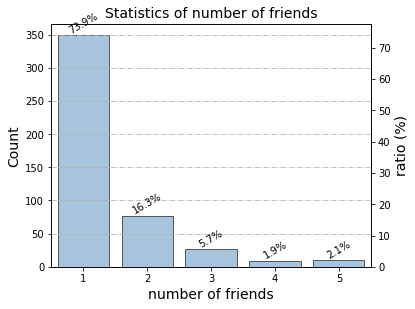

In [10]:
print(social_network.friend_list.map(len).describe())
visual_statistics_discrete(social_network.friend_list.map(len), "number of friends")

## Statistics of video features

count    10729.000000
mean         1.183148
std          0.436188
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: feat, dtype: float64


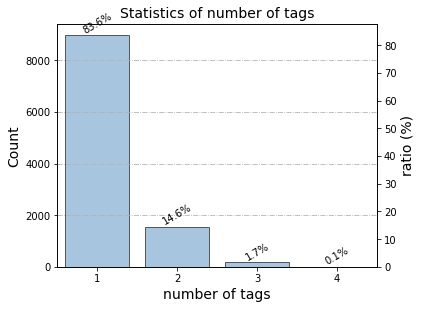

In [11]:
num_feat = item_feat.feat.map(len)
print(num_feat.describe())
visual_statistics_discrete(num_feat, "number of tags")

## Distribution of the 31 tags of items

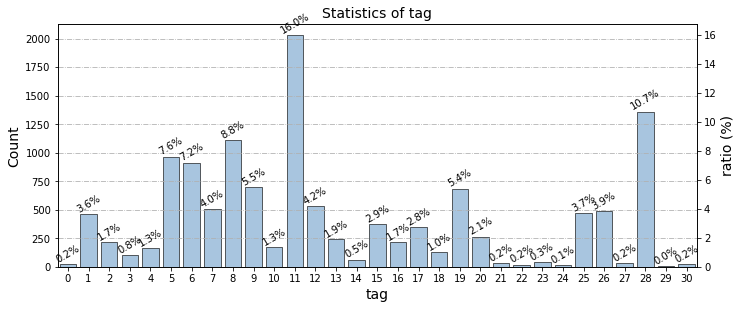

In [12]:
import collections
import itertools

cnt = item_feat.feat.map(collections.Counter)
cnt_all = collections.Counter()
for d in cnt:
    cnt_all.update(d)
# print(dict(cnt_all))
all_feat = pd.Series(sorted(list(itertools.chain.from_iterable([[i]*k for i,k in cnt_all.items()]))),name="feat")
# print(all_feat)
visual_statistics_discrete(all_feat, "tag", size=(12,4.5))

## Distribution of watch_ratio in big matrix

count    1.241552e+07
mean     8.510664e-01
std      7.185296e-01
min      0.000000e+00
25%      3.111008e-01
50%      7.161066e-01
75%      1.161843e+00
max      5.000000e+00
Name: watch_ratio, dtype: float64


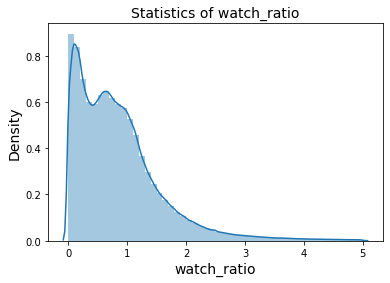

In [13]:
big_watch_ratio = big_matrix.watch_ratio[big_matrix.watch_ratio <= 5]
print(big_watch_ratio.describe())
visual_continue(big_watch_ratio)

## Distribution of watch_ratio in small matrix

count    4.653780e+06
mean     8.553870e-01
std      5.952060e-01
min      0.000000e+00
25%      4.657859e-01
50%      7.662410e-01
75%      1.114060e+00
max      5.000000e+00
Name: watch_ratio, dtype: float64


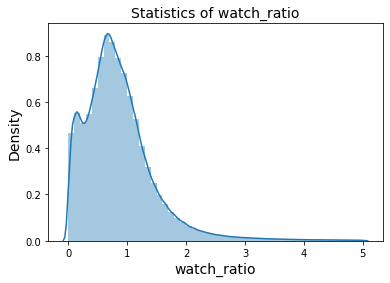

In [14]:
small_watch_ratio = small_matrix.watch_ratio[small_matrix.watch_ratio <= 5]
print(small_watch_ratio.describe())
visual_continue(small_watch_ratio)

## Distribution of video duration in the big matrix (in millisecond)

count    1.253081e+07
mean     1.462157e+04
std      1.983474e+04
min      1.400000e+02
25%      7.434000e+03
50%      9.636000e+03
75%      1.217900e+04
max      3.150720e+05
Name: video_duration, dtype: float64


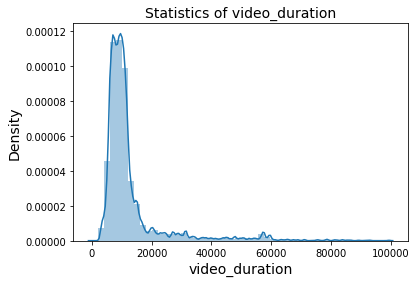

In [15]:
big_video_duration = big_matrix.video_duration
print(big_video_duration.describe())
# visual_continue(big_video_duration)
visual_continue(big_video_duration[big_video_duration < 100000])

## Distribution of video duration in the small matrix (in millisecond)

count    4.676570e+06
mean     1.448645e+04
std      2.046711e+04
min      3.067000e+03
25%      7.523000e+03
50%      9.600000e+03
75%      1.193400e+04
max      3.150720e+05
Name: video_duration, dtype: float64


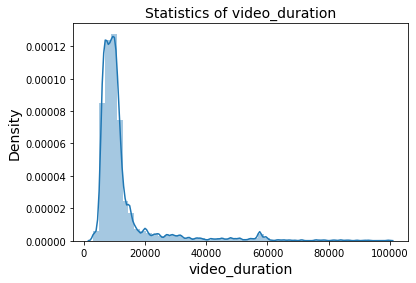

In [16]:
small_video_duration = small_matrix.video_duration
print(small_video_duration.describe())
# visual_continue(small_video_duration)
visual_continue(small_video_duration[small_video_duration < 100000])

## Distribution of each user's total play times in the big matrix

               date
count   7176.000000
mean    1746.210424
std      991.832222
min      100.000000
25%      883.000000
50%     1846.500000
75%     2461.000000
max    16015.000000


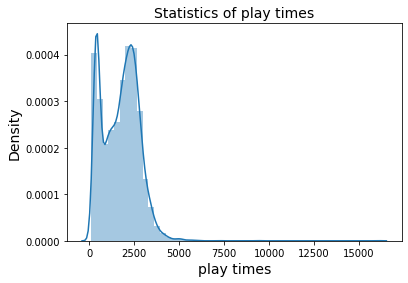

In [17]:
big_play_time = big_matrix.groupby('user_id').agg({"date":len})
big_play_time.name = "play times"
print(big_play_time.describe())
visual_continue(big_play_time)

## Distribution of each user's total play times in the small matrix

              date
count  1411.000000
mean   3314.365698
std       6.984852
min    3295.000000
25%    3309.000000
50%    3315.000000
75%    3320.000000
max    3327.000000


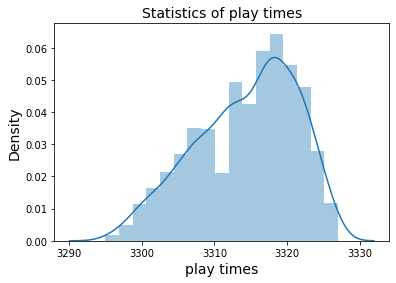

In [18]:
small_play_time = small_matrix.groupby('user_id').agg({"date":len})
small_play_time.name = "play times"
print(small_play_time.describe())
visual_continue(small_play_time)

## Distribution of each user's daily play times in the big matrix

count    188322.000000
mean         66.539257
std          78.752240
min           1.000000
25%          19.000000
50%          42.000000
75%          83.000000
max        3268.000000
Name: play times, dtype: float64


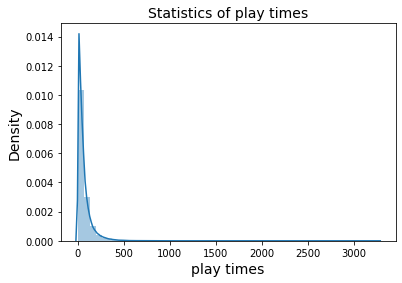

In [19]:
big_daily_play_time = big_matrix.groupby(['user_id', 'date']).size()
big_daily_play_time.name = "play times"
print(big_daily_play_time.describe())
visual_continue(big_daily_play_time)

## Distribution of each user's daily play times in the small matrix

count    86671.000000
mean        51.857922
std         32.608372
min          1.000000
25%         28.000000
50%         47.000000
75%         70.000000
max        402.000000
Name: play times, dtype: float64


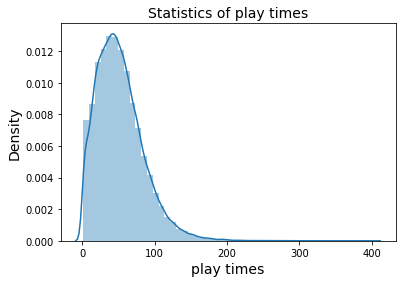

In [20]:
small_daily_play_time = small_matrix.groupby(['user_id', 'date']).size()
small_daily_play_time.name = "play times"
print(small_daily_play_time.describe())
visual_continue(small_daily_play_time)